In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
N_STEPS = 7

In [3]:
def diffuse(x0, t, betas = np.linspace(0, 1, N_STEPS)):
    alphas         = 1 - betas 
    alpha_hat      = np.cumprod(alphas) # product of all previous alphas
    noise_ammounts = alpha_hat[t].reshape(-1,1,1,1)

    noise    = np.random.normal(size = x0.shape) # sample normal dist
    mean     = np.sqrt(noise_ammounts) * x0
    variance = np.sqrt(1 - noise_ammounts) * noise
    return mean + variance, noise

In [4]:
def cos_schedule():
    def f(t):
        s = .008
        return np.cos( ((t/N_STEPS + s)/(1 + s) * np.pi/2) ) ** 2

    return np.array([1 - f(t)/f(0) for t in range(N_STEPS)])

In [5]:
def square_schedule():
    return np.linspace(0, 1, N_STEPS) ** 2

In [6]:
img = Image.open("chad.png").convert("RGB")

In [7]:
def format_image(img):
    # reshape image to range -1 to 1
    size = 128
    img = img.resize((size, size))
    arr = np.asarray(img)
    arr = 2 * (arr / 255) - 1
    return arr


In [8]:
def unformat_image(arr):
    # reshape image from -1 to 1 to 0-255
    arr = (arr + 1) / 2 # 0-1
    arr *= 255
    arr = arr.astype("uint8")
    img = Image.fromarray(arr)
    return img

In [10]:
img_tensor = format_image(img)
t = np.array([x for x in range(N_STEPS)])
input_images = np.stack([img_tensor] * len(t))
results, _ = diffuse(input_images, t, betas=square_schedule())

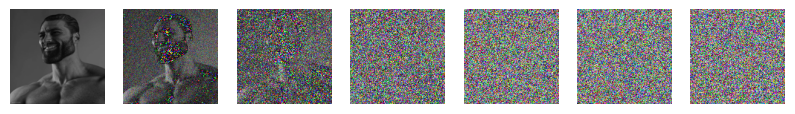

In [11]:
fig = plt.figure(figsize=(10,7))

for n, result in enumerate(results):
    fig.add_subplot(1, len(t), n+1)
    plt.imshow(unformat_image(result))
    plt.axis("off")